# Group by 

Let's take our hvac data and look at the mean power for houses with and without solar.

In [2]:
import utils

df = utils.read_csv('data/measured_real_power.csv')
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


## Create the base table 

We just want the mean values by **triplex_meter**.

In [3]:
mean_power = df.mean()
mean_power.head()

triplex_meter_0     197.401486
triplex_meter_1      85.223124
triplex_meter_2    1225.211889
triplex_meter_3    1018.304115
triplex_meter_4    1173.583409
dtype: float64

In [4]:
type(mean_power)

pandas.core.series.Series

In [5]:
mean_power = mean_power.reset_index()
mean_power.columns = ['house', 'power']
type(mean_power)

pandas.core.frame.DataFrame

In [6]:
mean_power.head()

,house,power
0,triplex_meter_0,197.401486
1,triplex_meter_1,85.223124
2,triplex_meter_2,1225.211889
3,triplex_meter_3,1018.304115
4,triplex_meter_4,1173.583409


## Read the relationship `DataFrame` 

In [7]:
import pandas as pd

housedf = pd.read_csv('data/triplex_meter_solar.csv')
housedf.head()

,triplex_meter,type
0,triplex_meter_11,nosolar
1,triplex_meter_18,nosolar
2,triplex_meter_19,solar
3,triplex_meter_10,solar
4,triplex_meter_17,solar


## Merge 

In [8]:
pd.merge(mean_power, housedf).head()

MergeError: No common columns to perform merge on

One way to fix this is to tell the `merge` function which columns you want to merge on.

In [9]:
pd.merge(mean_power, housedf, left_on='house', right_on='triplex_meter').head()

,house,power,triplex_meter,type
0,triplex_meter_0,197.401486,triplex_meter_0,solar
1,triplex_meter_1,85.223124,triplex_meter_1,solar
2,triplex_meter_2,1225.211889,triplex_meter_2,nosolar
3,triplex_meter_3,1018.304115,triplex_meter_3,nosolar
4,triplex_meter_4,1173.583409,triplex_meter_4,nosolar


Another option, you can rename the columns.

In [10]:
housedf.columns = ['house', 'type']
pd.merge(mean_power, housedf).head()

,house,power,type
0,triplex_meter_0,197.401486,solar
1,triplex_meter_1,85.223124,solar
2,triplex_meter_2,1225.211889,nosolar
3,triplex_meter_3,1018.304115,nosolar
4,triplex_meter_4,1173.583409,nosolar


In [11]:
merged = pd.merge(mean_power, housedf, on='house')
merged.head()

,house,power,type
0,triplex_meter_0,197.401486,solar
1,triplex_meter_1,85.223124,solar
2,triplex_meter_2,1225.211889,nosolar
3,triplex_meter_3,1018.304115,nosolar
4,triplex_meter_4,1173.583409,nosolar


Average power by type?

In [12]:
merged.groupby('type').mean()

,power
type,
nosolar,1141.269331
solar,237.341536


What about average power by `house` by `type`?

In [13]:
merged.pivot(index='house', columns='type', values='power').head()

type,nosolar,solar
house,,
triplex_meter_0,NaN,197.401486
triplex_meter_1,NaN,85.223124
triplex_meter_10,NaN,425.965910
triplex_meter_11,1150.707959,NaN
triplex_meter_12,1088.173470,NaN


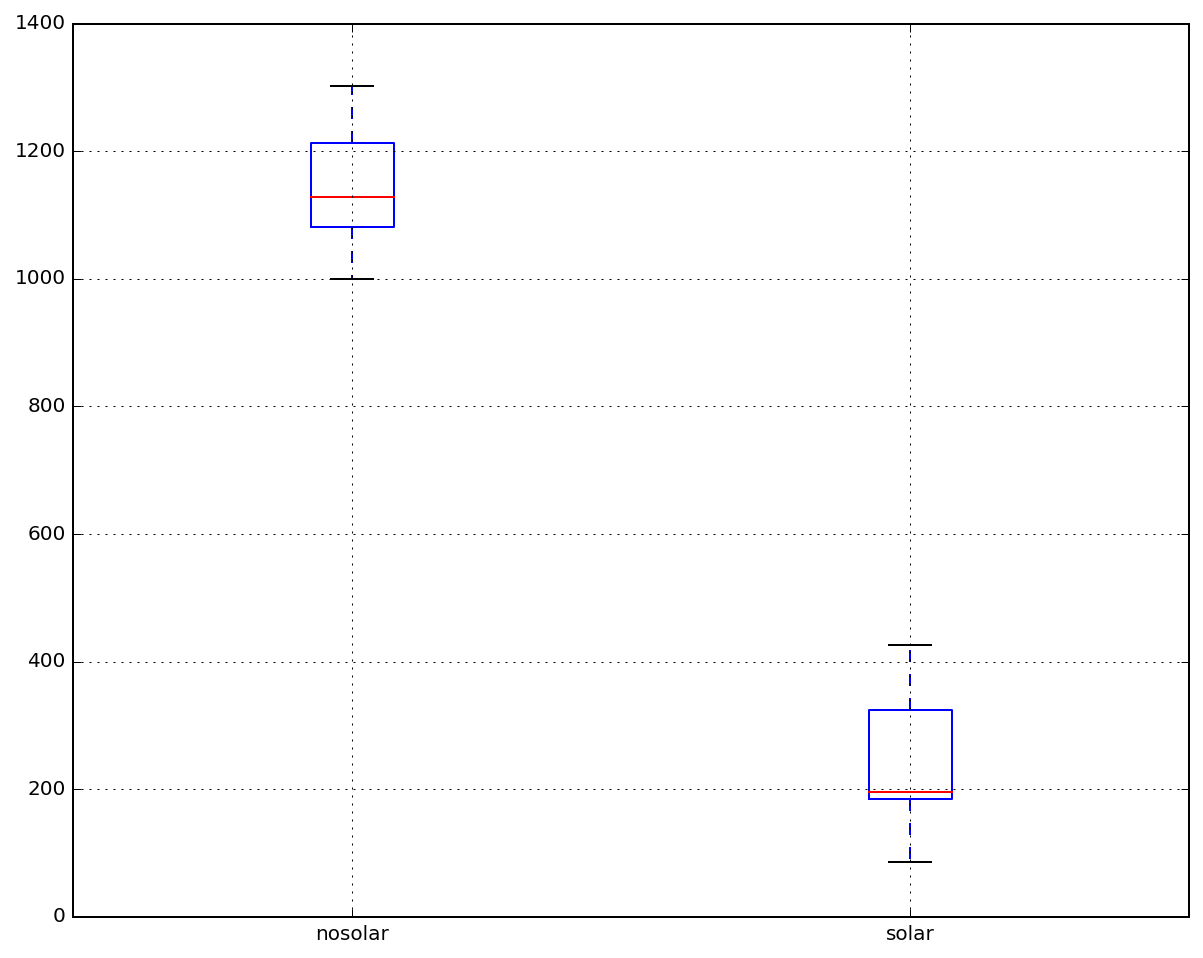

In [14]:
_ = merged.pivot(index='house', columns='type', values='power').boxplot(return_type='axes')

Save for later...

In [15]:
houses = merged.pivot(index='house', columns='type', values='power')
houses.to_csv('data/boxplot.csv')